In [52]:
from magpy.stream import *
from magpy.core import plot as mp
matplotlib.use('TkAgg')
%matplotlib widget

# 1.0 Reading data from the INTERMAGNET Webservice (supported by EPOS)

An important webservice is the [INTERMAGNET webservice](https://imag-data.bgs.ac.uk/GIN/) hosted at the British 
Geological Survey (BGS). Below you will find a  typical example of an access using several available options. 

In [43]:
data = read('https://imag-data-staging.bgs.ac.uk/GIN_V1/GINServices?request=GetData&observatoryIagaCode=HER&dataStartDate=2024-05-08T00:00:00Z&dataEndDate=2024-05-13T23:59:59Z&Format=iaga2002&elements=&publicationState=adj-or-rep&samplesPerDay=minute')

## 1.1 Plotting data 

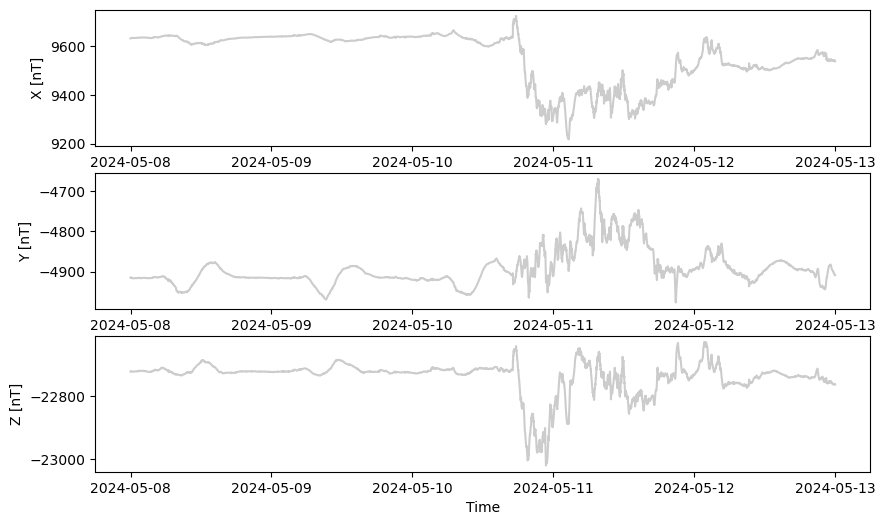

In [44]:
p,a = mp.tsplot(data, height=2)

# 2.0 Reading geomagnetic event data from the EPOS data portal

Download Ebro ... instructions to be added

In [48]:
events = read('/home/leon/Cloud/Daten/MagPyTestFiles/datastreams/ebroevents/SC_2024_P.dat')

In [49]:
events.stats()

{'SensorID': 'SC_2_0001',
 'Variables': ['x', 'y', 'z', 'f'],
 'Amount': 33,
 'Samplingperiod (sec)': 427830.0,
 'StationID': 'SC',
 'DataID': 'SC_2_0001_0001',
 'DataComponents': 'XYZF',
 'Starttime': datetime.datetime(2024, 1, 3, 5, 36),
 'Endtime': datetime.datetime(2024, 10, 28, 4, 47)}

## 2.1 Convert event time series information into flags

In [50]:
from magpy.core import flagging
sscflags = flagging.convert_to_flags(events, flagtype=3, labelid='020', sensorid=data.header.get("SensorID"), keystoflag=["x","y","z"], commentkeys="y", groups="geomagnetism")
 

## 2.2 Extracting and displaying relevant SSCs

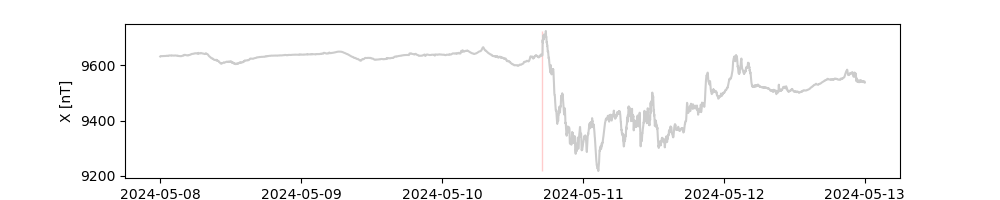

In [53]:
sscflags = sscflags.trim(starttime=data.start(), endtime=data.end())
p = sscflags.create_patch(data)

fig, ax = mp.tsplot(data, ['x'], patch=p, height=2)

# 3.0 Adding inidices data (currently from GFZ Potsdam)


In [55]:
kp = read('https://kp.gfz-potsdam.de/app/json/?start=2024-05-08T00:00:00Z&end=2024-05-13T23:59:59Z&index=Kp')

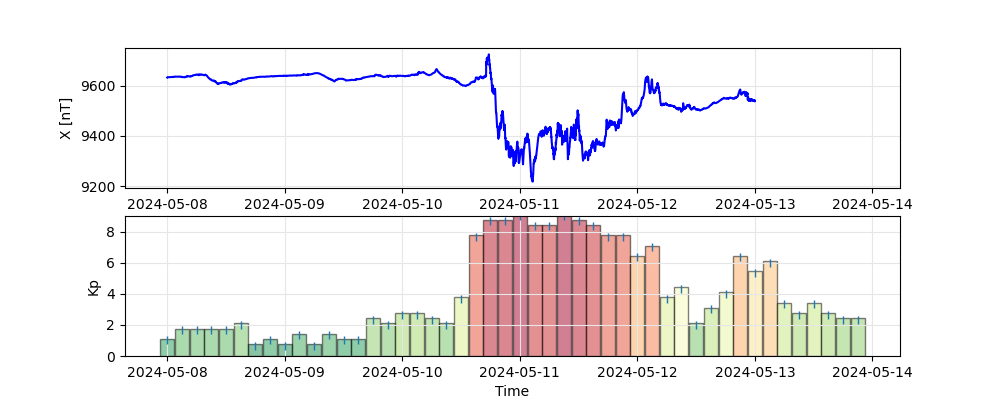

In [57]:
fig, ax = mp.tsplot([data,kp], [['x'],['var1']], symbols=[['-'],["k"]], colors=[['b'],['r']], grid=True,  height=2)
